In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## PRIMER ARCHIVO DE EXCEL

In [23]:
# esa es solo la primera hoja de ese archivo de excel

df = pd.read_excel("Cargas_Concat.xlsx")

combustible = df['Producto'].value_counts()
combustible

Producto
Diesel    7064
GNC        126
Name: count, dtype: int64

In [ ]:
df1 = pd.read_excel("Analisis de Cargas _ 2024 Ultimo trimestre.xlsx", sheet_name=5) # ese 5 es el #de hoja del excel, quien sabe porqué aparecen más y marca la de "cargas" com la 5

df1.columns

Index(['Unidad', 'Flota', 'EC', 'Fecha de Transacción', 'Operador',
       'ID OPERADOR', 'Estación', 'Costo por litro', 'Litros',
       'Costo por carga', 'Tipo de Carga', 'Semana', 'Día', 'Mes', 'Producto'],
      dtype='object')

In [25]:
df1_unique_units = df1[['Unidad', 'Producto', 'Flota']].drop_duplicates()

combustible1 = df1_unique_units.groupby('Unidad')['Producto'].first().reset_index()
combustible1

combustible_total1 = df1_unique_units.groupby('Producto')['Unidad'].nunique().reset_index(name='Unidades')
combustible_total1

combustible_por_flota1 = df1_unique_units.groupby(['Flota', 'Producto'])['Unidad'].nunique().unstack(fill_value=0)
combustible_por_flota1['Total'] = combustible_por_flota1.sum(axis=1)
combustible_por_flota1

Producto,Diesel,GNC,Total
Flota,,,
Available,74,4,78
Circuitos,59,1,60
Circuitos Mty,11,0,11
Colgate,4,1,5
Crisa,8,0,8
Full Liver,13,0,13
Hisense,11,0,11
JARREO,1,0,1
Liverpool Local,43,0,43


In [26]:
combustible_df1 = df1_unique_units['Producto'].value_counts()
combustible_df1

Producto
Diesel    522
GNC        21
Name: count, dtype: int64

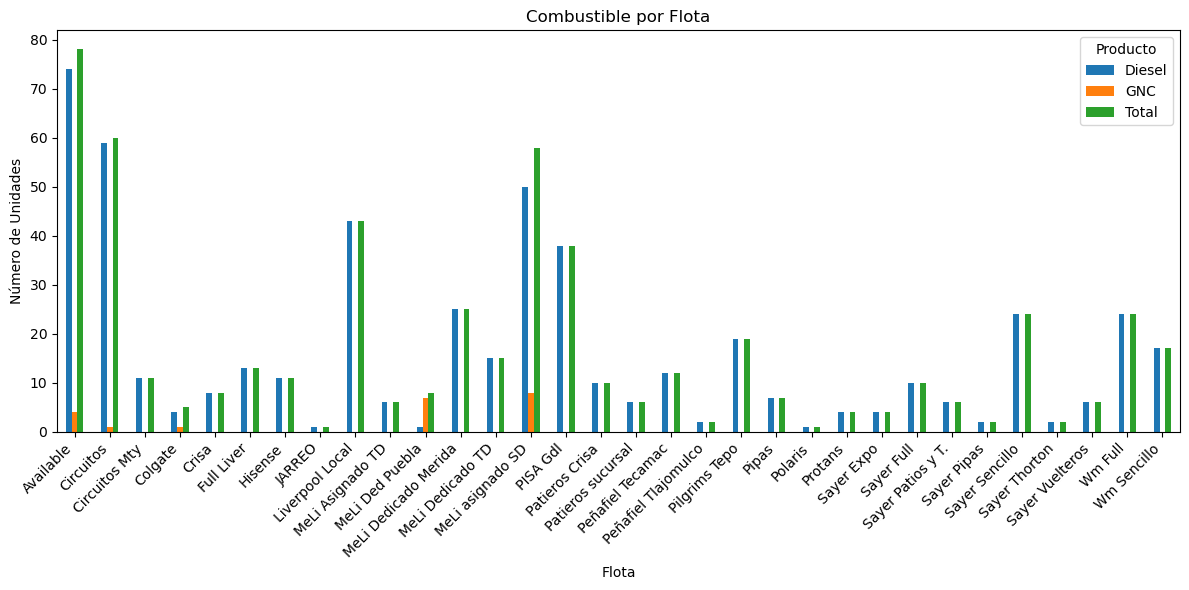

In [27]:
#   BARPLOT DE COMBUSTIBLE POR FLOTA Y SI USAN DIESEL O GNC

combustible_por_flota1.plot(kind='bar', figsize=(12, 6))
plt.title('Combustible por Flota')
plt.xlabel('Flota')
plt.ylabel('Número de Unidades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Producto')
plt.tight_layout()
plt.show()


In [28]:
df1_unique_units = df1[['Unidad', 'Producto', 'Flota']].drop_duplicates()

combustible1 = df1_unique_units.groupby('Unidad')['Producto'].first().reset_index()

combustible_total1 = df1_unique_units.groupby('Producto')['Unidad'].nunique().reset_index(name='Unidades')

combustible_por_flota1 = df1_unique_units.groupby(['Flota', 'Producto'])['Unidad'].nunique().unstack(fill_value=0)
combustible_por_flota1['Total Unidades'] = combustible_por_flota1.sum(axis=1)

litros_por_flota1 = df1.groupby(['Flota', 'Producto'])['Litros'].sum().unstack(fill_value=0)
litros_por_flota1['Total Litros'] = litros_por_flota1.sum(axis=1)

combustible_y_litros_por_flota1 = pd.concat([combustible_por_flota1, litros_por_flota1], axis=1)
combustible_y_litros_por_flota1

Producto,Diesel,GNC,Total Unidades,Diesel,GNC,Total Litros
Flota,,,,,,
Available,74,4,78,122881.64,2483.720,125365.360
Circuitos,59,1,60,736913.31,14217.495,751130.805
Circuitos Mty,11,0,11,47500.09,0.000,47500.090
Colgate,4,1,5,14580.86,60.000,14640.860
Crisa,8,0,8,18782.15,0.000,18782.150
Full Liver,13,0,13,235935.09,0.000,235935.090
Hisense,11,0,11,72067.32,0.000,72067.320
JARREO,1,0,1,248.00,0.000,248.000
Liverpool Local,43,0,43,286791.00,0.000,286791.000


In [29]:
df1_grupos = df1.groupby('Flota')['Producto'].nunique().sort_values(ascending=False)
df1_grupos

Flota
Available               2
MeLi Ded Puebla         2
Circuitos               2
Colgate                 2
MeLi asignado SD        2
Pipas                   1
Polaris                 1
Protans                 1
Sayer Expo              1
Sayer Full              1
Peñafiel Tlajomulco     1
Sayer Patios y T.       1
Sayer Pipas             1
Sayer Sencillo          1
Sayer Thorton           1
Sayer Vuelteros         1
Wm Full                 1
Pilgrims Tepo           1
Patieros sucursal       1
Peñafiel Tecamac        1
Patieros Crisa          1
PISA Gdl                1
MeLi Dedicado TD        1
MeLi Dedicado Merida    1
MeLi Asignado TD        1
Liverpool Local         1
JARREO                  1
Hisense                 1
Full Liver              1
Crisa                   1
Circuitos Mty           1
Wm Sencillo             1
Name: Producto, dtype: int64

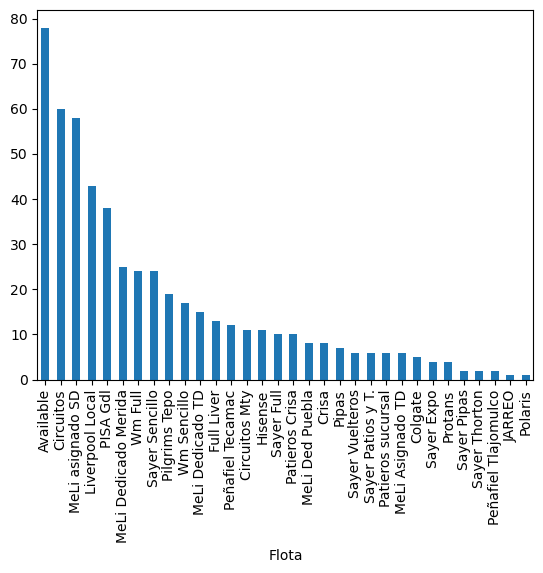

In [30]:
df1 = df1.groupby('Flota')['Unidad'].nunique().sort_values(ascending=False)
barplot = df1.plot(kind='bar')

In [31]:
df1["Fecha de Transacción"] = pd.to_datetime(df1["Fecha de Transacción"])

df1["Mes"] = df1["Fecha de Transacción"].dt.to_period("M").astype(str)

consumo_mensual1 = df1.groupby(["Flota", "Mes"])["Litros"].sum().reset_index()
consumo_mensual1

KeyError: 'Fecha de Transacción'

## SEGUNDO ARCHIVO DE EXCEL

In [ ]:
df2 = pd.read_excel("Analisis de Cargas al 7 de Marzo 2025.xlsx")

print(df2.columns)

Index(['Unidad', 'Flota', 'EC', 'Fecha de Transacción', 'Operador',
       'ID OPERADOR', 'Estación', 'Costo por litro', 'Litros',
       'Costo por carga', 'Tipo de Carga', 'Semana', 'Día', 'Mes', 'Producto'],
      dtype='object')


In [ ]:
df2_unique_units = df2[['Unidad', 'Producto', 'Flota']].drop_duplicates()

combustible2 = df2_unique_units.groupby('Unidad')['Producto'].first().reset_index()
combustible2

combustible_total2 = df2_unique_units.groupby('Producto')['Unidad'].nunique().reset_index(name='Unidades')
combustible_total2

combustible_por_flota2 = df2_unique_units.groupby(['Flota', 'Producto'])['Unidad'].nunique().unstack(fill_value=0)
combustible_por_flota2['Total'] = combustible_por_flota2.sum(axis=1)
combustible_por_flota2

Producto,Diesel,GNC,Total
Flota,,,
Available,19,0,19
Available EC-01,4,0,4
Available EC-02,1,3,4
Available EC-03,1,0,1
Available EC-04,11,0,11
Available EC-06,8,0,8
Available EC-07,6,1,7
Circuitos,54,1,55
Conductores Mty,2,0,2


In [ ]:
df2_unique_units = df2[['Unidad', 'Producto', 'Flota']].drop_duplicates()

combustible2 = df2_unique_units.groupby('Unidad')['Producto'].first().reset_index()

combustible_total2 = df2_unique_units.groupby('Producto')['Unidad'].nunique().reset_index(name='Unidades')

combustible_por_flota2 = df2_unique_units.groupby(['Flota', 'Producto'])['Unidad'].nunique().unstack(fill_value=0)
combustible_por_flota2['Total Unidades'] = combustible_por_flota2.sum(axis=1)

litros_por_flota = df2.groupby(['Flota', 'Producto'])['Litros'].sum().unstack(fill_value=0)
litros_por_flota['Total Litros'] = litros_por_flota.sum(axis=1)

combustible_y_litros_por_flota2 = pd.concat([combustible_por_flota2, litros_por_flota], axis=1)
combustible_y_litros_por_flota2

Producto,Diesel,GNC,Total Unidades,Diesel,GNC,Total Litros
Flota,,,,,,
Available,19,0,19,22078.63,0.000,22078.630
Available EC-01,4,0,4,21909.91,0.000,21909.910
Available EC-02,1,3,4,1672.00,988.060,2660.060
Available EC-03,1,0,1,476.00,0.000,476.000
Available EC-04,11,0,11,12756.66,0.000,12756.660
Available EC-06,8,0,8,9202.77,0.000,9202.770
Available EC-07,6,1,7,8546.16,118.400,8664.560
Circuitos,54,1,55,451519.11,6889.085,458408.195
Conductores Mty,2,0,2,2311.00,0.000,2311.000


In [ ]:
consumo_mensual2 = df2.groupby(["Flota", "Mes"])["Litros"].sum().reset_index()
consumo_mensual2

,Flota,Mes,Litros
0,Available,1,21133.63
1,Available,3,945.00
2,Available EC-01,2,21262.91
3,Available EC-01,3,647.00
4,Available EC-02,2,988.06
...,...,...,...
92,Wm Full,2,96702.42
93,Wm Full,3,23131.00
94,Wm Sencillo,1,21064.02
95,Wm Sencillo,2,21613.64


In [ ]:
combustible_df2 = df2_unique_units['Producto'].value_counts()
combustible_df2

Producto
Diesel    429
GNC        11
Name: count, dtype: int64

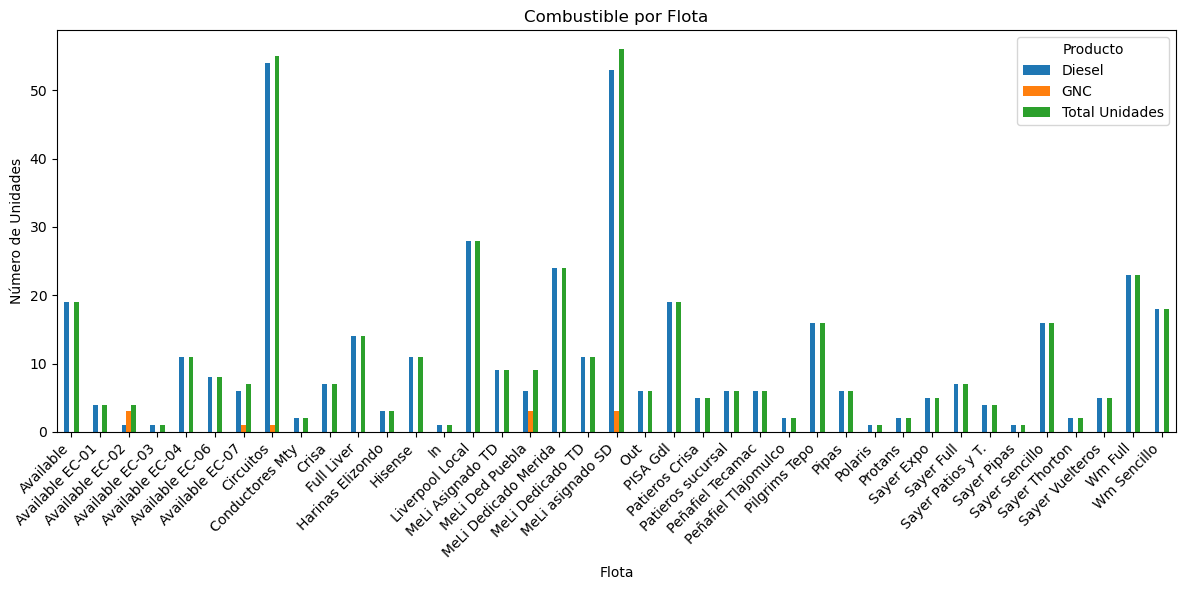

In [ ]:
#   BARPLOT DE COMBUSTIBLE POR FLOTA Y SI USAN DIESEL O GNC

combustible_por_flota2.plot(kind='bar', figsize=(12, 6))
plt.title('Combustible por Flota')
plt.xlabel('Flota')
plt.ylabel('Número de Unidades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Producto')
plt.tight_layout()
plt.show()


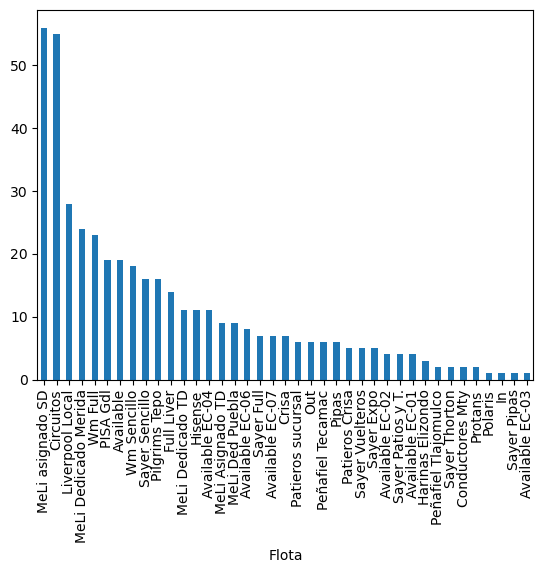

In [ ]:
df2 = df2.groupby('Flota')['Unidad'].nunique().sort_values(ascending=False)
df2
barplot = df2.plot(kind='bar')

## TERCER ARCHIVO DE EXCEL

In [ ]:
df3 = pd.read_excel("Ordenes Oct-Marzo 2025 Tec 2da version.xlsx")

print(df3.columns)

Index(['ord_number', 'EC', 'ID Proyecto', 'Proyecto', 'Cliente', 'Ub. Cliente',
       'CP Destino', 'Ciudad Destino', 'CP Origen', 'ord_originstate',
       'Ciudad Origen', 'Cierre de la Orden', 'Inicio de la Orden',
       'ord_carrier', 'Tracto', 'Conductor', 'Conductor2', 'ord_revtype2_name',
       'Remolque 1', 'Remolque 2', 'ord_revtype4_name', 'Ref Cliente',
       'origin_cmp_name', 'lgh_number', 'billto_cmp_name',
       'billto_cmp_primaryphone', 'dest_cmp_id', 'dest_cmp_name',
       'dest_cmp_primaryphone', 'ord_accessorial_chrg', 'ord_charge',
       'ord_totalcharge', 'kmsfacturables', 'kmstotales'],
      dtype='object')


In [ ]:
df3_todos = df3.groupby('Cliente')['Tracto'].nunique().sort_values(ascending=False)
df3_todos

Cliente
MERCADOL    96
MERCDEDI    86
LIVERPOL    76
LIVERDED    69
PALACIO     68
            ..
SOLID        1
INTSON       1
DHLMETRO     1
PILGRIMS     1
ENVASESU     1
Name: Tracto, Length: 63, dtype: int64

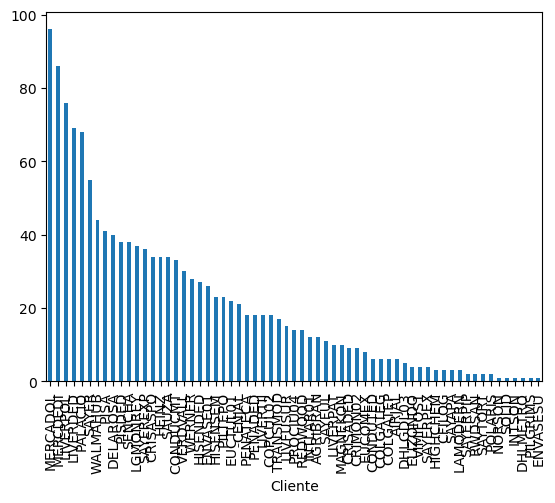

In [ ]:
df3 = df3.groupby('Cliente')['Tracto'].nunique().sort_values(ascending=False)
df3
barplot = df3.plot(kind='bar')

### En el df3 no tienen que tipo de carga se utilizó

** como definir profitability a partir de los costos indirectos

** cuantas empresas en mexico utilizan

**